# t-критерій Стьюдента для незалежних вибірок

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("data.csv", encoding="utf-8")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.loc[data.diagnosis=="M", "diagnosis"] = 1
data.loc[data.diagnosis=="B", "diagnosis"] = 2

In [6]:
group_1 = data.loc[data.diagnosis==1]
group_2 = data.loc[data.diagnosis==2]

In [7]:
def dropOutliers(group):
    Q1 = group.area_mean.quantile(0.25)
    Q3 = group.area_mean.quantile(0.75)
    IQR = Q3 - Q1
    group = group[~((group.area_mean < (Q1 - 1.5 * IQR)) | (group.area_mean > (Q3 + 1.5 * IQR)))]
    return group

In [8]:
group_1 = dropOutliers(group_1)
group_2 = dropOutliers(group_2)

In [9]:
from scipy.stats import norm, kstest

def test_KS(data):
    loc, scale = norm.fit(data)
    n = norm(loc=loc, scale=scale)
    stat, p = kstest(data, n.cdf)
    if p>0.05:
        print("distribution of the variable is normal")
    else:
        print("distribution of the variable is not normal")

In [10]:
test_KS(group_1.area_mean)

distribution of the variable is normal


In [11]:
test_KS(group_2.area_mean)

distribution of the variable is normal


Text(0.5, 0, 'area_mean')

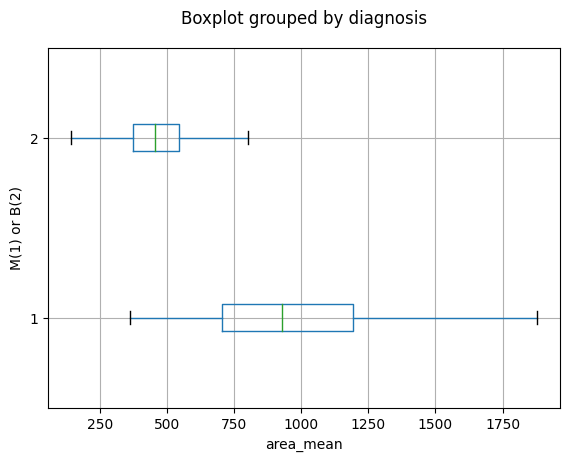

In [12]:
data_new = pd.concat([group_1, group_2])
boxplot = data_new.boxplot(column='area_mean', by='diagnosis', vert=False)
boxplot.set_title("")
boxplot.set_ylabel("M(1) or B(2)")
boxplot.set_xlabel("area_mean")

In [13]:
def test_stdLevene(group_1, group_2):
    sig1, sig2 = np.std(group_1.area_mean), np.std(group_2.area_mean)
    if sig1>sig2:
        f1 = len(group_1) - 1
        f2 = len(group_2) - 1
        f_emp = (sig1**2) / (sig2**2)
    else:
        f1 = len(group_2) - 1
        f2 = len(group_2) - 1
        f_emp = (sig2**2) / (sig1**2)
    table_crit = pd.read_excel("Critical Values of the Leven test.xlsx")
    f_crit = table_crit.iloc[21,12]
    if f_emp>f_crit:
        conclusion = "significant"
    else:
        conclusion = "not significant"
    return (f_emp, conclusion)

In [14]:
def test_meanStudent(group_1, group_2, conclusion):
    m1, m2 = np.mean(group_1.area_mean), np.mean(group_2.area_mean)
    n1, n2 = len(group_1), len(group_2)
    sig1, sig2 = np.std(group_1.area_mean), np.std(group_2.area_mean)
    if conclusion=="significant":
        t_emp = abs(m1 - m2) / np.sqrt(((n1-1) * (sig1**2) + (n2-1) * (sig2**2)) / (n1 + n2 - 2) * (1/n1 + 1/n2))
    else:
        t_emp = abs(m1 - m2) / np.sqrt(((sig1**2) / n1) + ((sig2**2) / n2))
    df = n1 + n2 - 2
    table_crit = pd.read_excel("Critical Values of the t-test.xlsx")
    t_crit = table_crit.iloc[90,1]
    if t_emp>t_crit:
        conclusion = "significant"
    else:
        conclusion = "not significant"
    return (t_emp, df, conclusion)

In [15]:
f_emp, conclusion = test_stdLevene(group_1, group_2)
(f_emp, conclusion)

(6.298995800168918, 'significant')

In [16]:
test_meanStudent(group_1, group_2, conclusion)

(25.89896649312334, 559, 'significant')